# Ipywidgets
## A way to make your notebooks more interactive

The main source of this content is the [ipywidgets docs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) and [this](https://kapernikov.com/ipywidgets-with-matplotlib/) nice blog post




In [2]:
import ipywidgets as w

## Widgets
Widgets are **eventful** *python objects* that have a representation in the browser, often as a **control** like a slider, textbox, etc.

In [11]:
myslider = w.IntSlider(max=10)
myslider

IntSlider(value=0, max=10)

In [5]:
myslider.value  # getting the current value of the slider

12

In [8]:
myslider.value = 20  # setting the value of the slider

To see the full list of attributes of the widget you can use `myslider.keys` (ignore the one starting with '_')

In [10]:
myslider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

## Other types of widgets
There are many widget types (see full list [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)).

Some of the most useful are:

In [12]:
w.Text(value='Hello World!')

Text(value='Hello World!')

In [13]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    orientation='horizontal',
    readout_format='.1f',
)

FloatSlider(value=7.5, description='Test:', max=10.0, readout_format='.1f')

In [14]:
widgets.BoundedIntText(min=0, max=10, value=4, step=2, description='Every 2:')

BoundedIntText(value=4, description='Every 2:', max=10, step=2)

In [15]:
widgets.Checkbox(
    value=False,
    description='Check me',
)

Checkbox(value=False, description='Check me')

In [35]:
widgets.Dropdown(
    options=['10:00', '20:00', '12:00'],
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', options=('10:00', '20:00', '12:00'), value='10:00')

In [47]:
f"{15.898:.1f}:00"

'15.9:00'

In [53]:
hours = []
for hour_int in range(24):
  for minutes in ('00', '15', '30', '45'):
    hour_str = f"{hour_int:02}:{minutes}"
    hours.append(hour_str)

widgets.Dropdown(options=hours)

Dropdown(options=('00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45', '02:00', '02:15', '0…

In [64]:
url = r'py.jpg'
image = open(url, "rb").read()
widgets.Image(
    value=image,
    width=100,
    height=200,
)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x…

In [59]:
x = 8
y=10
f"{x}:{y}"

('8:10', '10:8')

In [52]:
options=[f"{i:02}:00" for i in range(24)]
widgets.Dropdown(options=options)

Dropdown(options=('00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '1…

In [ ]:
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
    description='Pizza topping:',
)

# to solve the label cut-off issue see here: 
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html#Description

RadioButtons(description='Pizza topping:', options=('pepperoni', 'pineapple', 'anchovies'), value='pepperoni')

In [17]:
widgets.SelectMultiple(  
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    description='Fruits',
)

# or `widgets.Select` for single option only

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

other useful ones include
```python
widgets.Label     # read-only text to put next to widgets
widgets.Button
widgets.Password  # input text with asterisks
widgets.HTML      # render html
widgets.Image     # show images
widgets.Play      # play animations
widgets.DatePicker
widgets.ColorPicker
widgets.FileUpload
```
and more...

To combine them all together, use [Layout widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Container/Layout-widgets)

In [ ]:
# example using horizonatal box

items = []
for i in range(4):
  textbox = widgets.Text(f'Text {i}')
  items.append(textbox)

widgets.HBox(items)

# Example of combining widgets


In [21]:
int_slider = widgets.IntSlider(
    value=5, 
    min=0, max=10, step=1, 
    description='slider'
)
 
int_range_slider = widgets.IntRangeSlider(
    value=(20, 40), 
    min=0, max=100, step=2, 
    description='range slider'
)
 
dropdown = widgets.Dropdown(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='dropdown'
)
 
radiobuttons = widgets.RadioButtons(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='radio buttons'
)
 
combobox = widgets.Combobox(
    placeholder='start typing... (e.g. L or o)',
    options=['Amsterdam', 'Athens', 'Lisbon', 'London', 'Ljubljana'], 
    description='combo box'
)
 
checkbox = widgets.Checkbox(
    description='checkbox',
    value=True
)
 
 
# a VBox container to pack widgets vertically
widgets.VBox(
    [
      int_slider, 
      int_range_slider, 
      widgets.HBox([
          dropdown, 
          radiobuttons,
          checkbox,
          combobox,
      ])
    ]
)

In [19]:
dropdown.value

'feb'

# Interact
the `widget.interact` function allows linking widgets to functions, giving you the abiliy to perform custom calculations triggered by widget changes

In [22]:
def say_my_name(name):
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

## widget auto-generation
interact is actually smart enough to create widgets based on the type of inputs passed

In [23]:
def three(x, y, z):
    return (x, y, z)
 
_ = widgets.interact(
    three, 
    x=(0, 10, 1), 
    y=True, 
    z=['a', 'b', 'c']
)

interactive(children=(IntSlider(value=5, description='x', max=10), Checkbox(value=True, description='y'), Drop…

interact can also be used as *function decorator*, i.e. a nicer way to write extra functionality

In [24]:
@widgets.interact(x=['a', 'b', 'c'])
def my_func(x):
    return x

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Output()), _dom_classes=(…

equivalent to
```
def my_func(x):
    return x

widgets.interact(my_func, x=['a', 'b', 'c'])
```

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

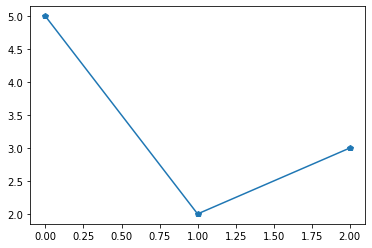

In [32]:
import pandas as pd

@widgets.interact(x=(0,10,1))
def create_plot(x):
  return pd.Series({0:5,1:x,2:3}).plot(style='p-')

create_plot(x=2)

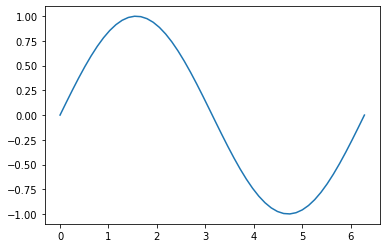

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [1]:
def plot_histogram(start_station, color):
  ax = plt.gca()
  data_local = dc_bikeshare[dc_bikeshare.start_station == start_station].copy()
    
  plt.hist(data_local.duration_seconds, range=(0, 1800), bins=200, color=color, alpha=0.8)
    # gca stands for get current axis
    ax.set_title("Duration histogram for {0}".format(start_station))
    
    plt.gca().set_xlabel("Duration in seconds")
    plt.gca().set_ylabel("Count")
    
    plt.show()

start_stations = dc_bikeshare.start_station.unique()

widgets.interact(plot_histogram, 
                 start_station = start_stations.tolist(), 
                 color=["green", "orange", "xkcd:navy blue"])